In [1]:
library(tidyverse)
library(forecast)
library(fpp2)
library(rnoaa)
library(lubridate)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.0.2     v forcats 0.5.1

Warning message:
"package 'tibble' was built under R version 4.1.2"
Warning message:
"package 'tidyr' was built under R version 4.1.2"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'forecast' was built under R version 4.1.2"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
"package 'fpp2' was built under R version 4.1.2"
-- Attaching packages -------------------------------------------------------------------------------------- fpp2 2.4 --

v fma       2.4     v expsmooth 2.3

Warni

In [2]:
stations <- ghcnd_stations()

using cached file: C:\Users\Maoli\AppData\Local/Cache/R/noaa_ghcnd/ghcnd-stations.rds

date created (size, mb): 2022-02-12 20:25:20 (2.159)

using cached file: C:\Users\Maoli\AppData\Local/Cache/R/noaa_ghcnd/ghcnd-inventory.rds

date created (size, mb): 2022-02-12 20:26:28 (2.669)



In [3]:
kyoto <- read.csv("../data/raw/kyoto.csv")
liestal <- read.csv("../data/raw/liestal.csv")
washingtondc <- read.csv("../data/raw/washingtondc.csv")

In [4]:
kyoto <- kyoto |> 
  mutate(id = "JA000047759")
washingtondc <- washingtondc |> 
  mutate(id = "USC00186350")
liestal <- liestal |> 
  mutate(id = "GME00127786")

van_id <- "CA001108395"

In [5]:
para_list <- c("tmax", "tmin", "prcp")
id_list <- c("JA000047759", "GME00127786", "USC00186350", "CA001108395")

In [6]:
kyoto_weather <- ghcnd_search(stationid = "JA000047759", date_min = "1950-01-01", date_max = "2022-01-31")[["tmax"]]
kyoto_weather <- merge(kyoto_weather, ghcnd_search(stationid = "JA000047759", date_min = "1950-01-01", date_max = "2022-01-31")[["tmin"]], by = c("date", 'id'))
kyoto_weather <- merge(kyoto_weather, ghcnd_search(stationid = "JA000047759", date_min = "1950-01-01", date_max = "2022-01-31")[["prcp"]], by = c("date", 'id')) |> 
  select(date, id, tmax, tmin, prcp)|> 
  mutate(tmax = tmax / 10, tmin = tmin / 10) |> 
  mutate(month = month(date), year = year(date))

using cached file: C:\Users\Maoli\AppData\Local/Cache/R/noaa_ghcnd/JA000047759.dly

date created (size, mb): 2022-02-21 00:47:14 (1.666)

file min/max dates: 1945-10-01 / 2022-02-28

using cached file: C:\Users\Maoli\AppData\Local/Cache/R/noaa_ghcnd/JA000047759.dly

date created (size, mb): 2022-02-21 00:47:14 (1.666)

file min/max dates: 1945-10-01 / 2022-02-28

using cached file: C:\Users\Maoli\AppData\Local/Cache/R/noaa_ghcnd/JA000047759.dly

date created (size, mb): 2022-02-21 00:47:14 (1.666)

file min/max dates: 1945-10-01 / 2022-02-28



In [7]:
van_weather <- ghcnd_search(stationid = "CA001108395", date_min = "1950-01-01", date_max = "2022-01-31")[["tmax"]]
van_weather <- merge(van_weather, ghcnd_search(stationid = "CA001108395", date_min = "1950-01-01", date_max = "2022-01-31")[["tmin"]], by = c("date", 'id'))
van_weather <- merge(van_weather, ghcnd_search(stationid = "CA001108395", date_min = "1950-01-01", date_max = "2022-01-31")[["prcp"]], by = c("date", 'id')) |> 
  select(date, id, tmax, tmin, prcp)|> 
  mutate(tmax = tmax / 10, tmin = tmin / 10) |> 
  mutate(month = month(date), year = year(date))

using cached file: C:\Users\Maoli\AppData\Local/Cache/R/noaa_ghcnd/CA001108395.dly

date created (size, mb): 2022-02-21 20:12:58 (1.283)

file min/max dates: 1957-01-01 / 2022-02-28

using cached file: C:\Users\Maoli\AppData\Local/Cache/R/noaa_ghcnd/CA001108395.dly

date created (size, mb): 2022-02-21 20:12:58 (1.283)

file min/max dates: 1957-01-01 / 2022-02-28

using cached file: C:\Users\Maoli\AppData\Local/Cache/R/noaa_ghcnd/CA001108395.dly

date created (size, mb): 2022-02-21 20:12:58 (1.283)

file min/max dates: 1957-01-01 / 2022-02-28



In [8]:
liestal_weather <- ghcnd_search(stationid = "GME00127786", date_min = "1950-01-01", date_max = "2022-01-31")[["tmax"]]
liestal_weather <- merge(liestal_weather, ghcnd_search(stationid = "GME00127786", date_min = "1950-01-01", date_max = "2022-01-31")[["tmin"]], by = c("date", 'id'))
liestal_weather <- merge(liestal_weather, ghcnd_search(stationid = "GME00127786", date_min = "1950-01-01", date_max = "2022-01-31")[["prcp"]], by = c("date", 'id')) |> 
  select(date, id, tmax, tmin, prcp)|> 
  mutate(tmax = tmax / 10, tmin = tmin / 10) |> 
  mutate(month = month(date), year = year(date))

using cached file: C:\Users\Maoli\AppData\Local/Cache/R/noaa_ghcnd/GME00127786.dly

date created (size, mb): 2022-02-21 03:07:32 (1.559)

file min/max dates: 1953-09-01 / 2021-12-31

using cached file: C:\Users\Maoli\AppData\Local/Cache/R/noaa_ghcnd/GME00127786.dly

date created (size, mb): 2022-02-21 03:07:32 (1.559)

file min/max dates: 1953-09-01 / 2021-12-31

using cached file: C:\Users\Maoli\AppData\Local/Cache/R/noaa_ghcnd/GME00127786.dly

date created (size, mb): 2022-02-21 03:07:32 (1.559)

file min/max dates: 1953-09-01 / 2021-12-31



In [9]:
dc_weather <- ghcnd_search(stationid = "USC00186350", date_min = "1950-01-01", date_max = "2022-01-31")[["tmax"]]
dc_weather <- merge(dc_weather, ghcnd_search(stationid = "USC00186350", date_min = "1950-01-01", date_max = "2022-01-31")[["tmin"]], by = c("date", 'id'))
dc_weather <- merge(dc_weather, ghcnd_search(stationid = "USC00186350", date_min = "1950-01-01", date_max = "2022-01-31")[["prcp"]], by = c("date", 'id')) |> 
  select(date, id, tmax, tmin, prcp)|> 
  mutate(tmax = tmax / 10, tmin = tmin / 10) |> 
  mutate(month = month(date), year = year(date))

using cached file: C:\Users\Maoli\AppData\Local/Cache/R/noaa_ghcnd/USC00186350.dly

date created (size, mb): 2022-02-12 22:42:14 (2.696)

file min/max dates: 1948-08-01 / 2021-10-31

using cached file: C:\Users\Maoli\AppData\Local/Cache/R/noaa_ghcnd/USC00186350.dly

date created (size, mb): 2022-02-12 22:42:14 (2.696)

file min/max dates: 1948-08-01 / 2021-10-31

using cached file: C:\Users\Maoli\AppData\Local/Cache/R/noaa_ghcnd/USC00186350.dly

date created (size, mb): 2022-02-12 22:42:14 (2.696)

file min/max dates: 1948-08-01 / 2021-10-31



In [10]:
kyoto_weather_tmax_ts <- ts(kyoto_weather$tmax, freq = 365)
kyoto_weather_tmin_ts <- ts(kyoto_weather$tmin, freq = 365)
kyoto_weather_prcp_ts <- ts(kyoto_weather$prcp, freq = 365)
van_weather_tmax_ts <- ts(van_weather$tmax, freq = 365)
van_weather_tmin_ts <- ts(van_weather$tmin, freq = 365)
van_weather_prcp_ts <- ts(van_weather$prcp, freq = 365)
liestal_weather_tmax_ts <- ts(liestal_weather$tmax, freq = 365)
liestal_weather_tmin_ts <- ts(liestal_weather$tmin, freq = 365)
liestal_weather_prcp_ts <- ts(liestal_weather$prcp, freq = 365)
dc_weather_tmax_ts <- ts(dc_weather$tmax, freq = 365)
dc_weather_tmin_ts <- ts(dc_weather$tmin, freq = 365)
dc_weather_prcp_ts <- ts(dc_weather$prcp, freq = 365)

In [11]:
model_kyoto_tmax <- auto.arima(kyoto_weather_tmax_ts)
model_kyoto_tmin <- auto.arima(kyoto_weather_tmin_ts)
model_kyoto_prcp <- auto.arima(kyoto_weather_prcp_ts)

In [12]:
model_van_tmax <- auto.arima(van_weather_tmax_ts)
model_van_tmin <- auto.arima(van_weather_tmin_ts)
model_van_prcp <- auto.arima(van_weather_prcp_ts)

In [13]:
model_liestal_tmax <- auto.arima(liestal_weather_tmax_ts)
model_liestal_tmin <- auto.arima(liestal_weather_tmin_ts)
model_liestal_prcp <- auto.arima(liestal_weather_prcp_ts)

In [14]:
model_dc_tmax <- auto.arima(dc_weather_tmax_ts)
model_dc_tmin <- auto.arima(dc_weather_tmin_ts)
model_dc_prcp <- auto.arima(dc_weather_prcp_ts)

In [15]:
kyoto_tmax_hat <- forecast(model_kyoto_tmax, h = 11*365)
kyoto_tmin_hat <- forecast(model_kyoto_tmin, h = 11*365)
kyoto_prcp_hat <- forecast(model_kyoto_prcp, h = 11*365)

In [16]:
van_tmax_hat <- forecast(model_van_tmax, h = 11*365)
van_tmin_hat <- forecast(model_van_tmin, h = 11*365)
van_prcp_hat <- forecast(model_van_prcp, h = 11*365)

In [17]:
liestal_tmax_hat <- forecast(model_liestal_tmax, h = 11*365)
liestal_tmin_hat <- forecast(model_liestal_tmin, h = 11*365)
liestal_prcp_hat <- forecast(model_liestal_prcp, h = 11*365)

In [18]:
dc_tmax_hat <- forecast(model_dc_tmax, h = 11*365)
dc_tmin_hat <- forecast(model_dc_tmin, h = 11*365)
dc_prcp_hat <- forecast(model_dc_prcp, h = 11*365)

In [31]:
kyoto_extra <- tibble(tmax = kyoto_tmax_hat$mean, 
                      tmin = kyoto_tmin_hat$mean, 
                      prcp = kyoto_prcp_hat$mean, 
                      date = seq(ymd("2022-2-1"), ymd("2033-1-28"), by = "days"))

In [34]:
van_extra <- tibble(tmax = van_tmax_hat$mean, 
                      tmin = van_tmin_hat$mean, 
                      prcp = van_prcp_hat$mean, 
                      date = seq(ymd("2022-2-1"), ymd("2033-1-28"), by = "days"))

In [48]:
liestal_extra <- tibble(tmax = liestal_tmax_hat$mean, 
                      tmin = liestal_tmin_hat$mean, 
                      prcp = liestal_prcp_hat$mean, 
                      date = seq(ymd("2022-1-1"), ymd("2032-12-28"), by = "days"))

In [50]:
dc_extra <- tibble(tmax = dc_tmax_hat$mean, 
                      tmin = dc_tmin_hat$mean, 
                      prcp = dc_prcp_hat$mean, 
                      date = seq(ymd("2021-11-1"), ymd("2032-10-28"), by = "days"))

In [51]:
write.csv(kyoto_extra,"../data/processed/kyoto_extra.csv", row.names = FALSE)
write.csv(van_extra,"../data/processed/van_extra.csv", row.names = FALSE)
write.csv(liestal_extra,"../data/processed/liestal_extra.csv", row.names = FALSE)
write.csv(dc_extra,"../data/processed/dc_extra.csv", row.names = FALSE)

In [10]:
# check the extrapolated data by graph

kyoto_weather_tmax_ts <- ts(kyoto_weather$tmax, freq = 365)
model_kyoto_tmax <- auto.arima(kyoto_weather_tmax_ts)

In [15]:
tmax_extra <- forecast(model_kyoto_tmax, h = 10*365)

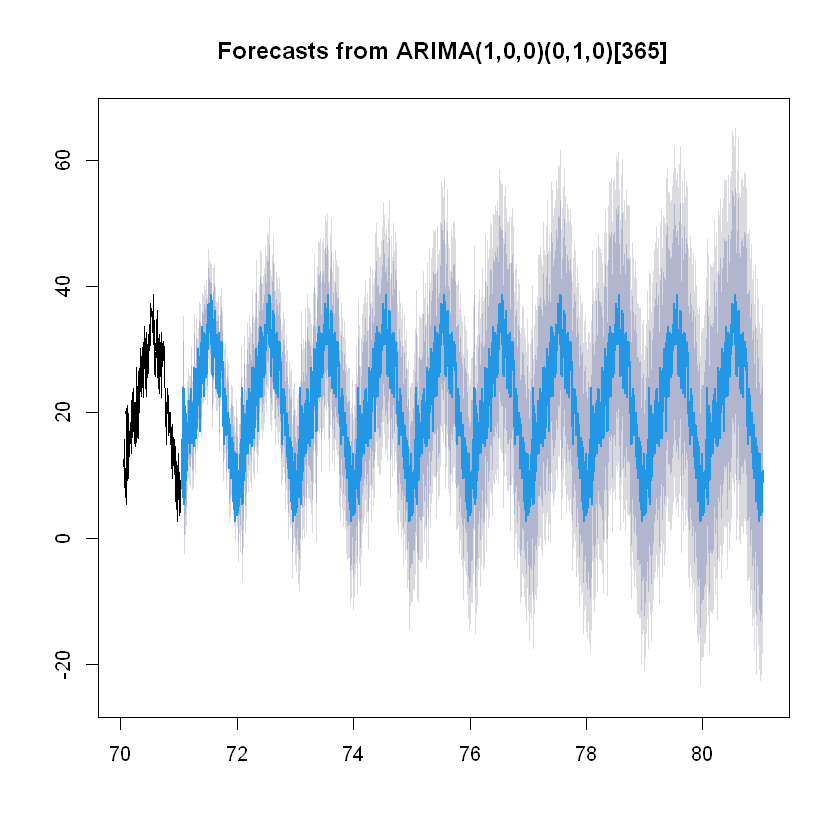

In [21]:
p <- plot(tmax_extra, include = 365)

In [25]:
# save the plot

jpeg('../figures/tmax_extra.jpg')
plot(tmax_extra, include = 365)
dev.off()

png 
  2